In [68]:
import psycopg2
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
connection = psycopg2.connect(user="postgres", password="postgres", host="127.0.0.1", port="63333", database="stack_overflow")

In [6]:
with connection:
    with connection.cursor() as cursor:
        cursor.execute("""select country, count(*) as total
        from users u
        group by country""")
        u_countries_df = pd.DataFrame(cursor.fetchall(), columns=["country", "users"])

In [13]:
p_countries_df = pd.read_csv("../preprocessing/countryInfo.txt", delimiter="\t", usecols=["Country", "Population"])

In [23]:
countries_df = u_countries_df.join(p_countries_df.set_index('Country'), on="country").dropna()
countries_df.sort_values(by=["Population"], ascending=False).head()

,country,users,Population
104,China,107956,1.411779e+09
241,India,715071,1.352617e+09
613,United States,573934,3.271674e+08
246,Indonesia,62802,2.676634e+08
417,Pakistan,80769,2.122150e+08


<Axes: xlabel='Population', ylabel='users'>

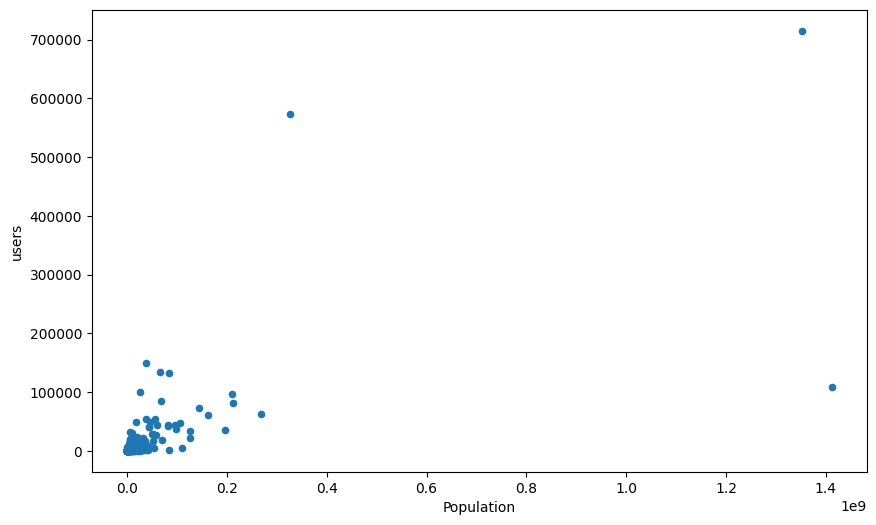

In [24]:
countries_df.plot(x="Population", y="users", kind="scatter")

<Axes: xlabel='Population', ylabel='users'>

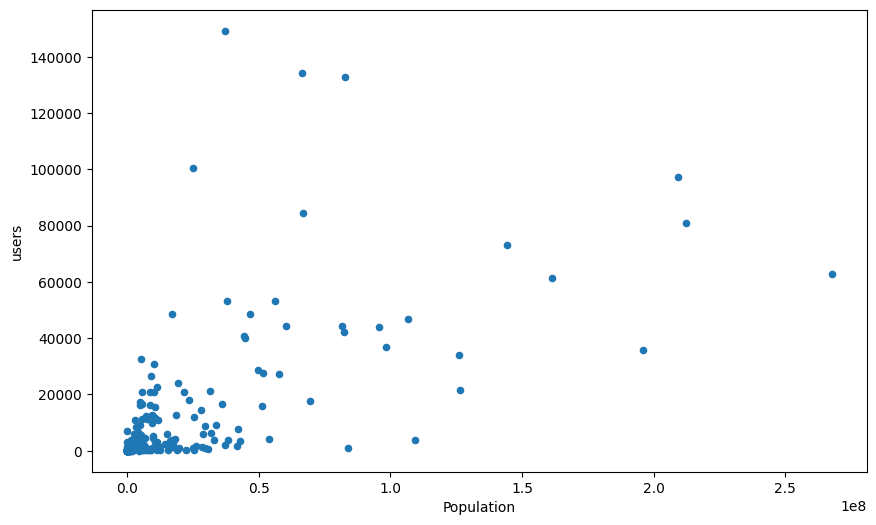

In [22]:
countries_df[countries_df["Population"]< 3e8].plot(x="Population", y="users", kind="scatter")

In [50]:
model = sm.OLS(countries_df["users"], countries_df["Population"])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  users   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.503
Method:                 Least Squares   F-statistic:                              248.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                    4.03e-39
Time:                        01:21:22   Log-Likelihood:                         -2972.2
No. Observations:                 245   AIC:                                      5946.
Df Residuals:                     244   BIC:                                      5950.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

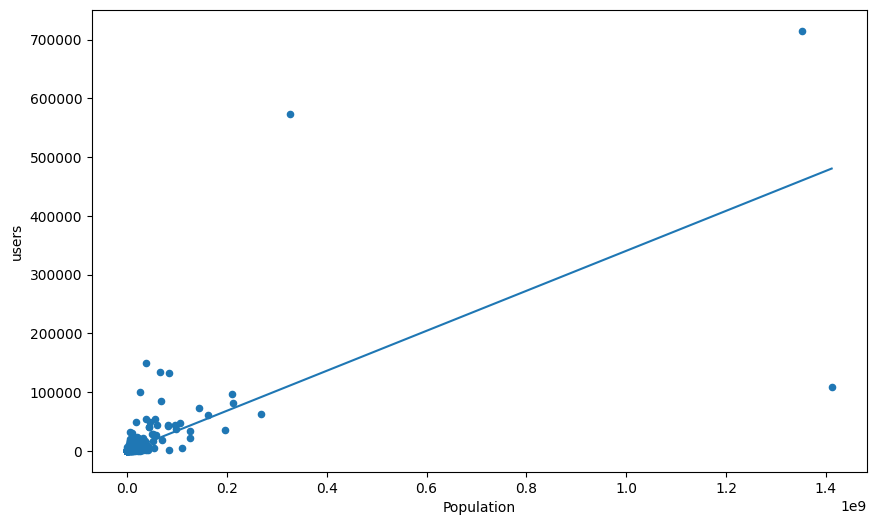

In [47]:
countries_df.plot(x="Population", y="users", kind="scatter")
max_pop = countries_df["Population"].max()
plt.plot([0,max_pop],[0, max_pop*results.params["Population"]]);

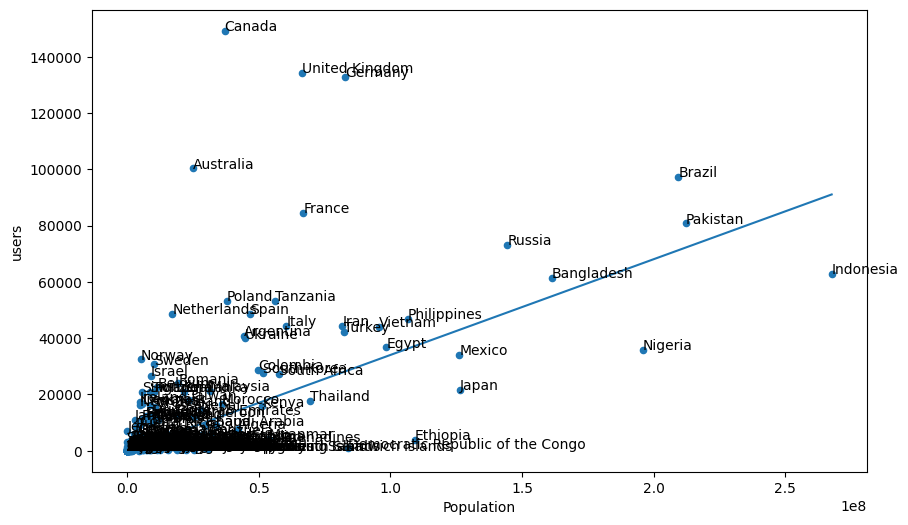

In [52]:
countries_df[countries_df["Population"]< 3e8].plot(x="Population", y="users", kind="scatter")
max_pop = countries_df[countries_df["Population"]< 3e8]["Population"].max()
plt.plot([0,max_pop],[0, max_pop*results.params["Population"]])

for label, x, y in zip(countries_df[countries_df["Population"]< 3e8]["country"],
                       countries_df[countries_df["Population"]< 3e8]["Population"],
                       countries_df[countries_df["Population"]< 3e8]["users"]):
    plt.annotate(label, xy=(x, y));

In [60]:
countries_df["error"] = countries_df["Population"]*results.params["Population"]-countries_df["users"]

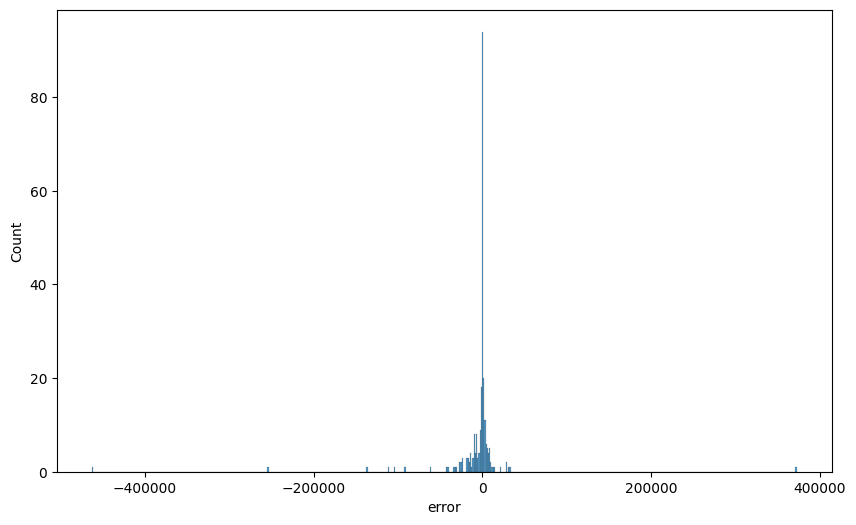

In [67]:
sns.histplot(data=countries_df, x="error");

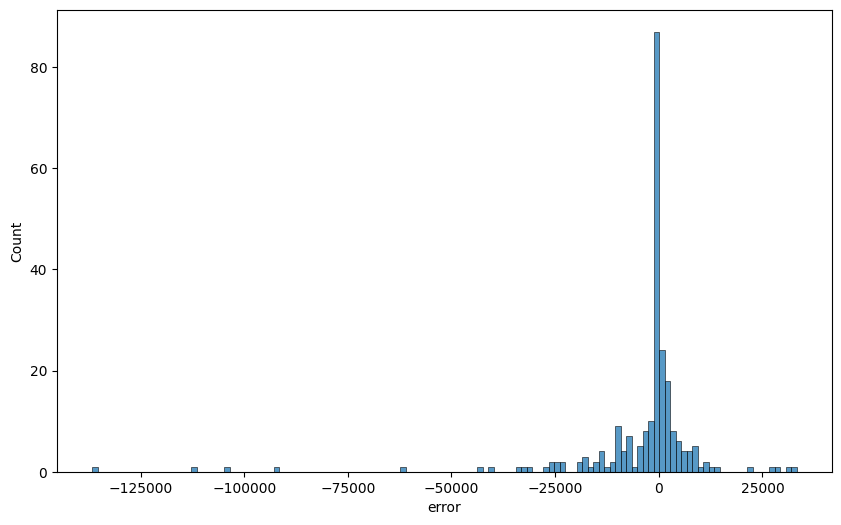

In [69]:
sns.histplot(data=countries_df[countries_df["Population"]< 3e8], x="error");